### EDA on Supermarket sales Dataset

In [690]:
import pandas as pd
import numpy as np
import time
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [691]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import plotly.express as px

In [692]:
df = pd.read_csv("https://raw.githubusercontent.com/Devanshgupta43/Data-Science/main/Supermarketales_data.csv")
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by Samsill,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [694]:
df.isnull().sum()

Row ID           0 
Order ID         0 
Order Date       0 
Ship Date        0 
Ship Mode        0 
Customer ID      0 
Customer Name    0 
Segment          0 
Country          0 
City             0 
State            0 
Postal Code      11
Region           0 
Product ID       0 
Category         0 
Sub-Category     0 
Product Name     0 
Sales            0 
dtype: int64

In [695]:
df[df['City']=='Burlington']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
683,684,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
684,685,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AP-10002457,Office Supplies,Appliances,"Eureka The Boss Plus 12-Amp Hard Box Upright Vacuum, Red",167.440
1008,1009,US-2018-106705,26/12/2018,01/01/2019,Standard Class,PO-18850,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,OFF-PA-10001509,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" Book, 5 1/2"" X 4""",44.750
1038,1039,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10000203,Office Supplies,Art,Newell 336,23.968
1039,1040,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10004790,Office Supplies,Art,Staples in misc. colors,28.728
1393,1394,CA-2018-124828,03/07/2018,04/07/2018,First Class,YS-21880,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10003514,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
2928,2929,US-2018-120390,19/10/2018,26/10/2018,Standard Class,TH-21550,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5065,5066,CA-2018-142090,30/11/2018,07/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,TEC-AC-10002001,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976
5066,5067,CA-2018-142090,30/11/2018,07/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference Table,1781.682


In [696]:
df[['City','State','Postal Code']][df['Postal Code'].isna()]

,City,State,Postal Code
2234,Burlington,Vermont,NaN
5274,Burlington,Vermont,NaN
8798,Burlington,Vermont,NaN
9146,Burlington,Vermont,NaN
9147,Burlington,Vermont,NaN
9148,Burlington,Vermont,NaN
9386,Burlington,Vermont,NaN
9387,Burlington,Vermont,NaN
9388,Burlington,Vermont,NaN
9389,Burlington,Vermont,NaN


In [697]:
df['Postal Code'] = df['Postal Code'].fillna(05402.0)
df[(df.City == 'Burlington') & (df.State == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5402.0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,5402.0,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,5402.0,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5402.0,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5402.0,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5402.0,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5402.0,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5402.0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5402.0,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5402.0,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [698]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [699]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [700]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [701]:
df['Postal Code'] = df['Postal Code'].astype(int).astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [702]:
top_cities= df.groupby("City").sum().sort_values("Sales",ascending=False).head(15)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities

fig=px.bar(top_cities,x='City',y='Sales',title="Top 15 Cities",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

#  New York city has highest sale among top 15 cities.

In [703]:
top_states= df.groupby("State").sum().sort_values("Sales",ascending=False).head(15)
top_states= top_states[['Sales']].round(2)
top_states.reset_index(inplace=True)
top_states
fig=px.bar(top_states,x='State',y='Sales',title="Top 15 Cities",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# California has highest sale among top 15 states.

In [704]:
fig = px.pie(df, values=np.ones(9800), names='Ship Mode', title='Ship Mode',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# People opt for standard class of shipping mode most of the time.

In [705]:
fig = px.pie(df, values=np.ones(9800), names='Segment', title='Segment',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Most of the orders come from Consumer segment

In [706]:
Segments= df.groupby("Segment").sum().sort_values("Sales",ascending=False)
Segments= Segments[['Sales']].round(2)
Segments.reset_index(inplace=True)

fig=px.pie(Segments,names='Segment',values='Sales',title="Sales by Segments",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [707]:
fig = px.pie(df, values=np.ones(9800), names='Category', title='Category',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Most ordered Category was Office Supplies.

In [708]:
Category= df.groupby("Category").sum().sort_values("Sales",ascending=False).head(15)
Category= Category[['Sales']].round(2)
Category.reset_index(inplace=True)

fig = px.pie(Category, values='Sales', names='Category', title='Sales by Category',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Highest selling Category is Technology followed by Furniture and then Office Supplies

In [709]:
fig = px.pie(df, values=np.ones(9800), names='Sub-Category', title='Sub Category',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Most ordered Sub Category is Binders and least Ordered Sub Category is Copiers.

In [710]:
regions= df.groupby("Region").sum().sort_values("Sales",ascending=False)
regions= regions[['Sales']].round(2)
regions.reset_index(inplace=True)

fig=px.pie(regions,names='Region',values='Sales',title="Regional Sales",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# West has Highest sale while South has lowest sale.

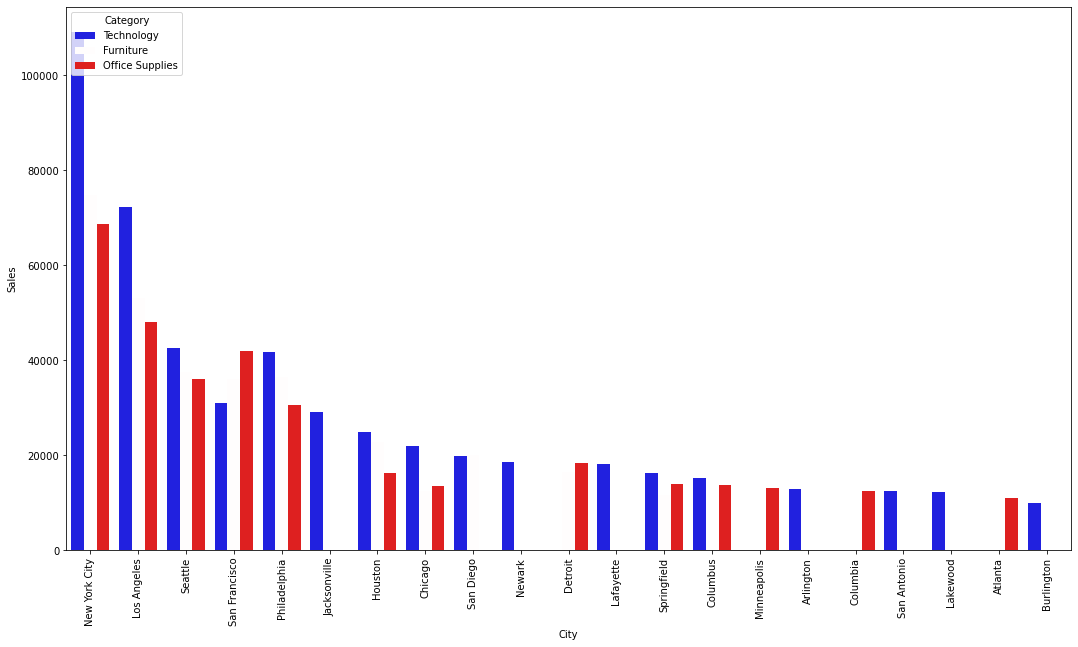

In [753]:
plt.figure(figsize=(18,10))
top_cities= df.groupby(["City","Category"]).sum().sort_values("Sales",ascending=False).head(40)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
sns.barplot(x='City',y='Sales',hue='Category',data=top_cities,palette='seismic')
plt.xticks(rotation='vertical')
plt.show()

# New York City has highest sale in Technology Category

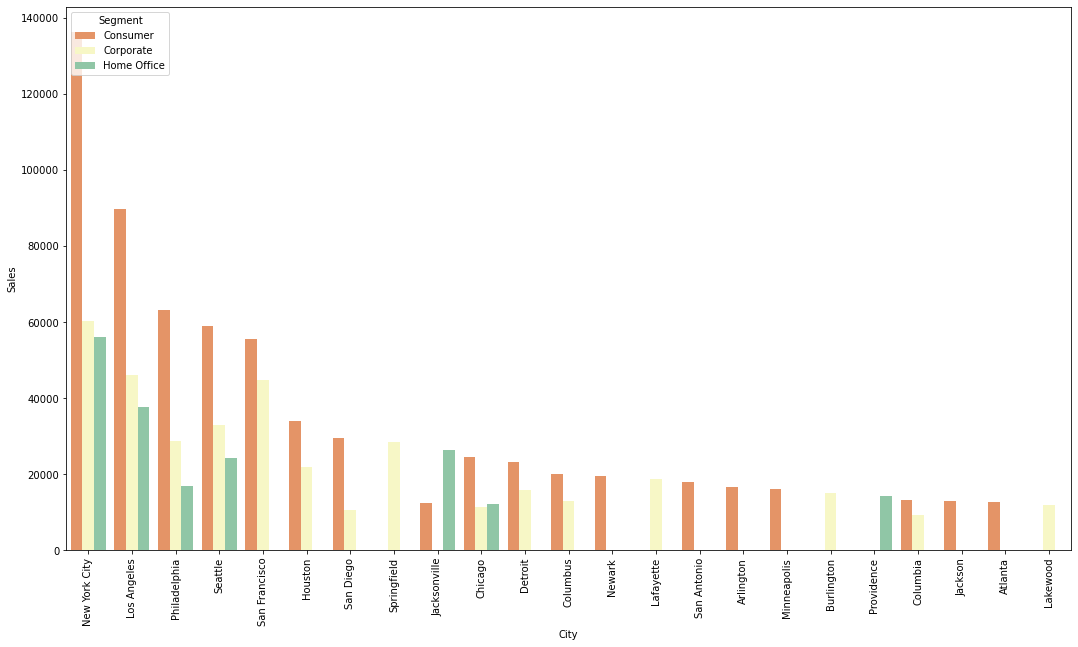

In [756]:
plt.figure(figsize=(18,10))
top_cities= df.groupby(["City","Segment"]).sum().sort_values("Sales",ascending=False).head(40)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
sns.barplot(x='City',y='Sales',hue='Segment',data=top_cities,palette='Spectral')
plt.xticks(rotation='vertical')
plt.show()

# New York City has highest sale in Consumer Segment.

# Final Report

<ul style = color:#010521;font-size:160%;>
    <li>New york city has the most sales</li>
    <li>California State has the most sales </li>
    <li>Standard Class is the most common ship mode </li>
    <li>most orders are from consumers </li>
    <li>most orders are of Office Suppliers</li>
    <li>Technological products have the most sales </li>
    <li>most orders was of Binders </li>
    <li>most sales was from the West Region </li>
    <li>most sales was from the consumers </li>
    <li>in tha last two figures we can sea the common products categories and segments in the top 10 consuming cities which provides great informations that helps the products marketing way in every city </li>
</ul>